# Species에 따라 sepal_width의 평균값 차이가 있는지 검정하라.

In [13]:
# 데이터 로드
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
#1. anova test를 시행하기 위해 종속변수가 수치형, 독립변수가 명목형인지 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# species 종류 확인
species_list = df.species.unique()
species_list

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
setosa = df[df['species'] == species_list[0]]['sepal_width']
versicolor = df[df['species'] == species_list[1]]['sepal_width']
verginica = df[df['species'] == species_list[0]]['sepal_width']

In [17]:
# species가 3개의 종류가 있으므로 One-way Anova test를 시행한다. 
#1) 독립변수가 정규성을 만족하는 지 확인하기
import scipy.stats as stats
print('setosa : ',stats.shapiro(setosa))
print('versicolor : ', stats.shapiro(versicolor))
print('verginica : ', stats.shapiro(verginica))

setosa :  ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)
versicolor :  ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)
verginica :  ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)


In [19]:
# setosa, versicolor, verginica 모두 p-value가 0.05보다 크므로 정규성을 만족함을 알 수 있다. 
# 2) 독립변수가 등분산성을 만족하는지 확인하기 위해 등분산 검정을 시행한다.
# H0: 집단간 분산이 같다
# H1: 적어도 두 집단 간 분산이 다르다
stats.levene(setosa, versicolor, verginica)

LeveneResult(statistic=0.3612776487996536, pvalue=0.6974024399936251)

In [20]:
# 등분산 검정에서 p-value가 0.05보다 크므로 대립가설을 기각하고 귀무가설을 채택한다. 따라서 세 집단 간 분산이 같다고 말할 수 있다.
# 등분산 검정까지 완료하였으므로 One-way ANOVA Test를 시행한다.
# One-way ANOVA test의 H0: 세 가지 종에 대해 sepal_width의 평균은 모두 같다.
# One-way ANOVA test의 H1: 적어도 하나의 종에 대한 sepal_width의 평균값에는 차이가 있다. 
stats.f_oneway(setosa, versicolor, verginica)

F_onewayResult(statistic=56.10537061132087, pvalue=7.840234434544949e-19)

In [21]:
# ANOVA 검정 결과 p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.
# 즉, 적어도 하나의 종에 대한 sepal_width의 평균값에는 차이가 있다. 
# 현재 집단 간 평균이 확실히 다르다는 것을 확인할 수 있으며, 정확한 차이를 판별하기 위해 사후 검정을 시행한다.

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = df['sepal_width'], groups = df['species'])
tuekeyhsd = mc.tukeyhsd(alpha = 0.05)
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.658,0.0,-0.8189,-0.4971,True
setosa,virginica,-0.454,0.0,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0088,0.0431,0.3649,True


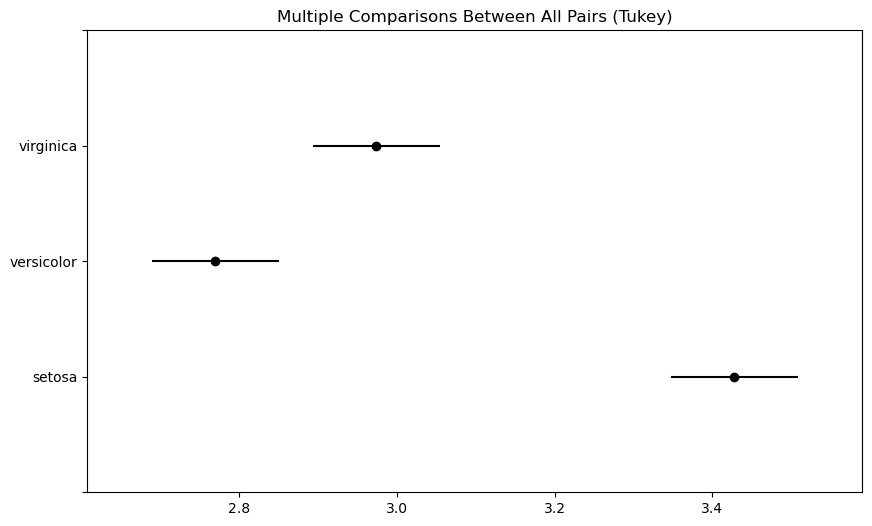

In [22]:
fig = tuekeyhsd.plot_simultaneous()

In [ ]:
# 사후 분석 결과 setosa, versicolor, verginica 세 가지 비교에 대해 모두 수정된 p-value값 (p adj)이 0.05보다 작으므로, 각각의 비교에 대해
# 귀무가설을 모두 기각한다. 즉, 모든 종들에 대해 sepal width의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다. 